In [1]:
from hw3align.sequences import *
from hw3align.getmatrix import blosum50
from hw3align.getmatrix import blosum62
from hw3align.getmatrix import pam100
from hw3align.getmatrix import pam250
from hw3align.getmatrix import matio
from hw3align.smithwaterman import sw
from hw3align.getseq import *
from hw3align.roc import *

from hw3align.optimalmatrix import *
import sys
import matplotlib.pyplot as plt
import sklearn.metrics as skm

In [17]:
def makeRocPlotLC(scorematrix, gap_start, gap_extend, name):
	'''
    
	This function input is a scoring matrix and gap start/extend params.
    This function will find the ROC using known TP and TN data
    This function output is a PDF plot. 
    
	'''
	#Score the true positives and true negatives...we've seen this before
	posScores = [sw(a,b, scorematrix, gap_start, gap_extend)[2] for a,b in positives]
	negScores = [sw(a,b, scorematrix, gap_start, gap_extend)[2] for a,b in negatives]
	#Sklearn's ROC stuff expects a single vector of truepositive/truenegative identities
	# and a single vector of scores. so need to make those vectors here:
	allScores = posScores + negScores #single vector of scores
	allClasses = [1]*len(posScores) + [0]*len(negScores) #single vector of tp and tn identities
	fpr, tpr, threshold = skm.roc_curve(allClasses, allScores) #now put them into sklearn program
	roc_auc = skm.auc(fpr, tpr) #the roc function takes tpr and false positive rate
    
	#plot. Adapted from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
	fig, axes = plt.figure(), plt.axes()
	plt.title('Receiver Operating Characteristic for' + name +' with gap start %s and extend %s' % \
	(gap_start, gap_extend))
	plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
	plt.legend(loc = 'lower right')
	plt.plot([0, 1], [0, 1],'r--')
	plt.xlim([0, 1])
	plt.ylim([0, 1])
	axes.set_aspect('equal', 'box')
	plt.ylabel('True Positive Rate')
	plt.xlabel('False Positive Rate')
	plt.show()


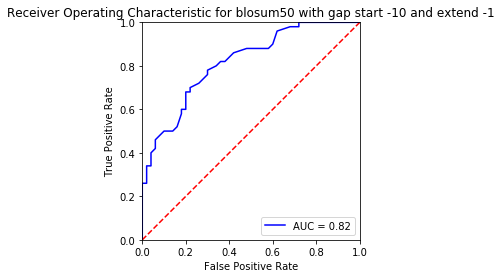

In [18]:
makeRocPlotLC(blosum50, -10, -1, " blosum50")

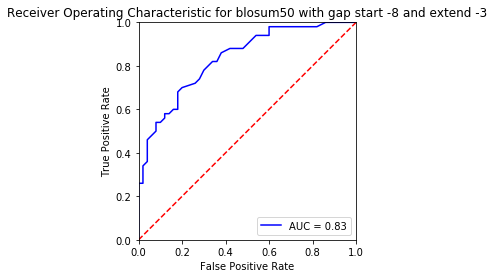

In [19]:
makeRocPlotLC(blosum50, -8, -3, " blosum50")

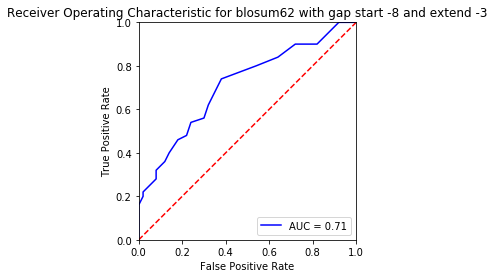

In [20]:
makeRocPlotLC(blosum62, -8, -3, " blosum62")

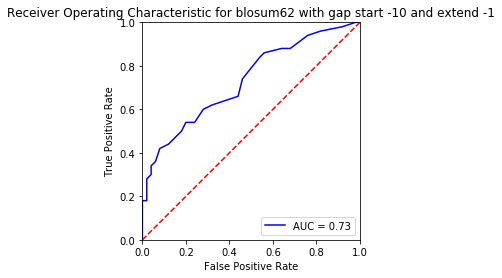

In [21]:
makeRocPlotLC(blosum62, -10, -1, " blosum62")

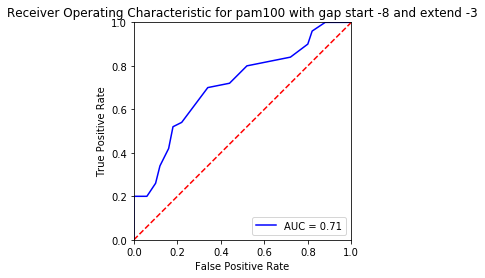

In [22]:
makeRocPlotLC(pam100, -8, -3, " pam100")

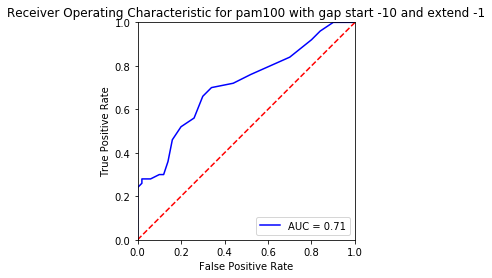

In [25]:
makeRocPlotLC(pam100, -10, -1, " pam100")

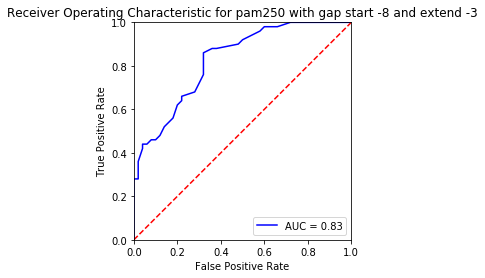

In [23]:
makeRocPlotLC(pam250, -8, -3, " pam250")

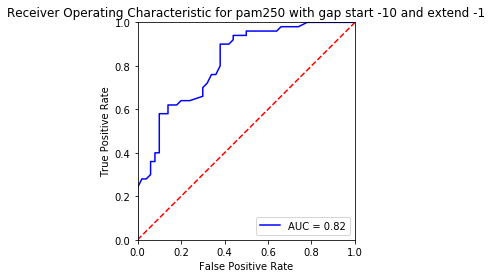

In [26]:
makeRocPlotLC(pam250, -10, -1, " pam250")

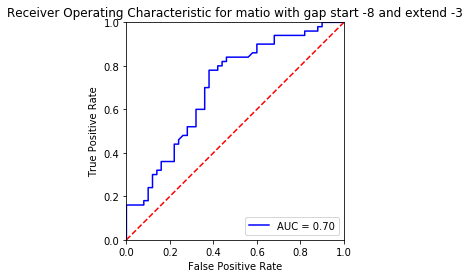

In [24]:
makeRocPlotLC(matio, -8, -3, " matio")

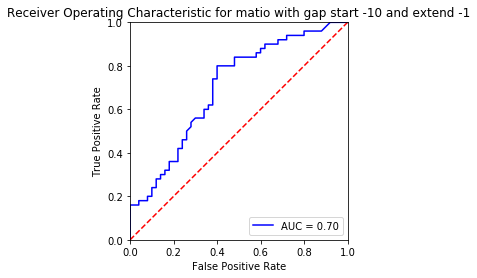

In [27]:
makeRocPlotLC(matio, -10, -1, " matio")

In [ ]:
#Testing:
testC, testD = positives[7]

In [ ]:
print(positives[7])

In [ ]:
sw(testC, testD, blosum50, -10, -1)

In [ ]:
getAlignments(blosum50, -10, -1)